# ✳ Neural Network Training
## ✅ 데이터 학습
### ▶ 딥러닝 개요
####    
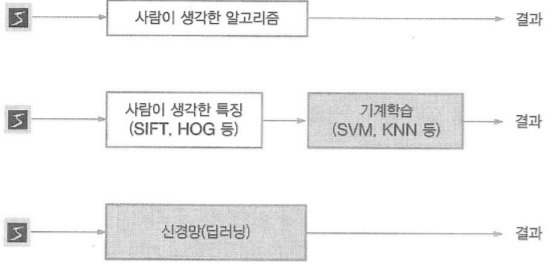
####   
- 위 그림에서 2번째 방식은 특징을 사람이 설계했지만, 신경망은 그 특징까지도 기계가 스스로 학습
- 딥러닝 == end-to-end machine learning
    - 문제의 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도

### ▶ training data vs test data
- 기계학습은 훈련데이터와 시험데이터로 나누어 학습과 실험을 수행
- 훈련데이터 : 최적의 매개변수 찾기 | 시험데이터 : 훈련한 모델 평가
- **overfitting : 특정 dataset에만 지나치게 최적화된 상태**
    - **이 overfitting을 피하는 것이 기계학습의 중요 과제**
    
## ✅ 손실함수 (Loss function / cost function)
### 💡 NOTE
- loss function : 신경망 성능의 **'나쁨'** 의 정도를 표현
    - 손실함수에 마이너스를 곱하면 성능이 얼마나 좋은지에 대한 지표로도 활용 가능
    
### ▶ 평균 제곱 오차 (mean squared error, MSE)
$E = \frac{1}{2}{\displaystyle\sum_{k}{(y_k - t_k)^2}}$

- MSE는 각 원소의 출력(추정값) 과 정답 label(참 값)의 차 $(y_k - t_k)$ 를 제곱한 후, 그 총합을 구함

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
import numpy as np
# mean squared error function 사용해보기

# 실제 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex. '2'일 확률이 가장 높다고 추정 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('ex1 result : ', mean_squared_error(np.array(y), np.array(t)))

# ex2. '7'일 확률이 가장 높다고 추정 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('ex2 result : ', mean_squared_error(np.array(y), np.array(t)))

ex1 result :  0.09750000000000003
ex2 result :  0.5975


- 이 경우 ex1에서의 오차는 약 0.0975, ex2에서의 오차는 약 0.597이므로 첫번째 추정이 정답일 가능성이 높다고 판단한 것

### ▶ 교차 엔트로피 오차 (cross entropy error, CEE)
$E = -{\displaystyle\sum_{k}{t_klogy_k}}$

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
# cross entropy error function 사용해보기

# 실제 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex. '2'일 확률이 가장 높다고 추정 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('ex1 result : ', cross_entropy_error(np.array(y), np.array(t)))

# ex2. '7'일 확률이 가장 높다고 추정 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('ex2 result : ', cross_entropy_error(np.array(y), np.array(t)))

ex1 result :  0.510825457099338
ex2 result :  2.302584092994546


- 교차 엔트로피도 평균 제곱 오차와 마찬가지로 첫번째 추정이 정답일 가능성이 높다고 판단

### ▶ 미니배치 학습
- 훈련 데이터 모두에 대한 손실함수의 합 구하기
- 🔽 **데이터 하나에 대한 cost function을 N개의 데이터로 확장하고, N으로 나누어 정규화**
####   
$E = -\frac{1}{N}{\displaystyle\sum_{n}}{\displaystyle\sum_{nk}{t_klogy_nk}}$
####   
- 미니배치 학습 : 수많은 훈련 데이터(60,000) 중 일부(100) 을 무작위로 뽑아 학습

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 전체 MNIST dataset
print('x_train shape : ', x_train.shape)
print('t_train shape : ', t_train.shape)

# 무작위로 10개 빼내기
train_size = x_train.shape[0]
batch_size = 10

batch_mask = np.random.choice(train_size, batch_size) # data size 범위에서 batch size만큼 무작위 추출
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

x_train shape :  (60000, 784)
t_train shape :  (60000, 10)


### ▶ (배치용) 교차 엔트로피 오차 구현

In [17]:
# ont-hot-encoding ver
def cross_entropy_error1(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# number lable ver
def cross_entropy_error2(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

- np.log(y[np.arange(batch_size), t]) 의 의미
    - np.arange(batch_size) : 0 ~ batch_size - 1 까지 배열 생성
    - y[np.arange(batch_size), t] : 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출

### ▶ why cost function?
- 우리의 목적 == 높은 '정확도' 를 끌어내는 매개변수를 찾는 것
    - 그렇다면 **왜 '정확도' 대신 손실 함수의 값을 거치는 것일까?**
- **'미분' 의 역할에 주목해보자.**
    - 신경망 학습에서는 최적의 매개변수 (weight, bias) 를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수의 값을 탐색
    - 이 때, 매개변수의 미분(기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신
    - 만약, 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변환
    - 양수면 반대로 음의 방향으로 변환히켜 손실함수의 값을 줄일 수 있음
    - 미분 값이 0이면 가중치 매개변수를 어느쪽으로 움직여도 손실함수의 값은 달라지지 X
        - 이 때, 가중치 매개변수의 갱신이 멈춤
    - **정확도를 지표로 삼아서는 안되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신 할 수 없기 때문**
        - why?
        - 만약 한 신경망의 정확도가 32%라고 가정하자.
        - 매개변수를 조금 바꾼다고 해도 정확도는 그대로 32%
            - 즉 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지
            - 정확도가 개선된다 하더라도 32 -> 32.0123 같은 연속적인 변화가 아니라 32->33->34 같은 불연속적인 변화
        - 반면 손실 함수를 지표로 삼는다면 매개변수의 작은 변화에 그대로 반응하여 0.92543 -> 0.93432 처럼 연속적으로 변화
        - **즉, 정확도는 매개변수의 작은 변화에는 거의 반응X 반응이 있더라도 불연속적으로 갑자기 변화**
            - 이는 계단함수를 활성화함수로 사용하지 않는 이유와 동일